In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
def my_sampler(size, dist, requires_grad = False):
    t_dist = torch.tensor(dist) #turning the list dist to a tensor object
    t_sum = torch.cumsum(t_dist, dim=0) #creating a tensor filled with the cumsum's of t_dist
    n = float(len(dist)-1) #retrieving the size of the dist list
    
    #making sure all the elements in dist are greater then 1 and the sum of all them is equal to 1
    assert t_dist.sum() == 1, 'The sum of the probabilities is greater then 1'
    assert torch.all(torch.gt(t_dist, 0)), 'There is negative probabilities'

    #creating a tensor with the size of 'size' filled with random numbers from a uniform distribution
    s_tensor = torch.rand(size, dtype=torch.double)  
    #implementing the first step of the algo, if U < p0 return 0
    f_tensor1 = torch.where(s_tensor<t_sum[0], 0., s_tensor)  
    #implementing the second step of the algo, if U >= to the sum of the probabilities from 0 to n-1 return n
    f_tensor2 = torch.where(s_tensor>=t_sum[-2], n, f_tensor1)
    #implementing the third step of the algo, finding the index that uphold the terms of the sigma's
    for i in range(t_dist.numel() - 1):
        f_tensor = torch.where((f_tensor2>t_sum[i]) & (f_tensor2<t_sum[i+1]), float(i+1), f_tensor2)
        f_tensor2 = f_tensor
    return f_tensor

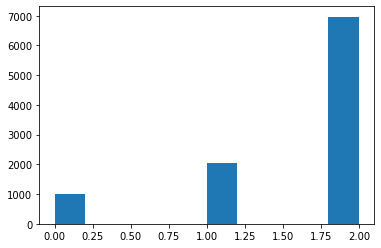

In [10]:
num_of_samples = 10000
plt.hist(my_sampler(num_of_samples,[0.1,0.2,0.7]))
plt.show()